# GAMA-15 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
04829ed (Thu Nov 2 16:57:19 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_gama-15_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_gama-15_20171120.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

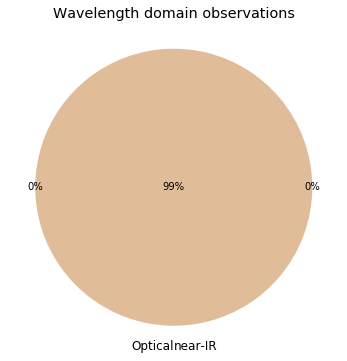

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

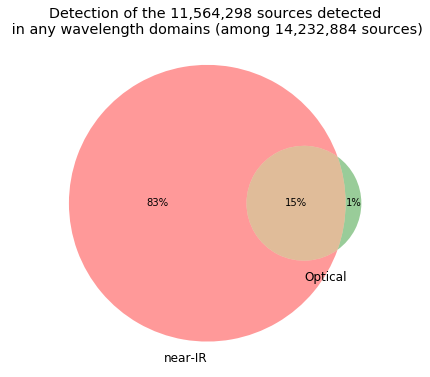

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = [           "KIDS u"]
g_bands = ["DECam g", "KIDS g", "SUPRIME g", "GPC1 g"]
r_bands = ["DECam r", "KIDS r", "SUPRIME r", "GPC1 r"]
i_bands = ["DECam i", "KIDS i", "SUPRIME i", "GPC1 i"]
z_bands = ["DECam z",           "SUPRIME z", "GPC1 z"]
y_bands = ["DECam y",           "SUPRIME y", "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

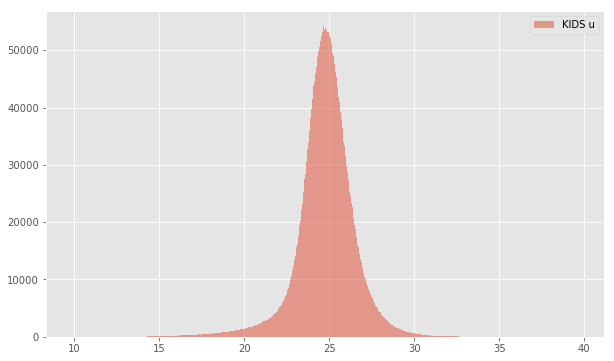

HELP warning: the column m_decam_g (DECam g) is empty.


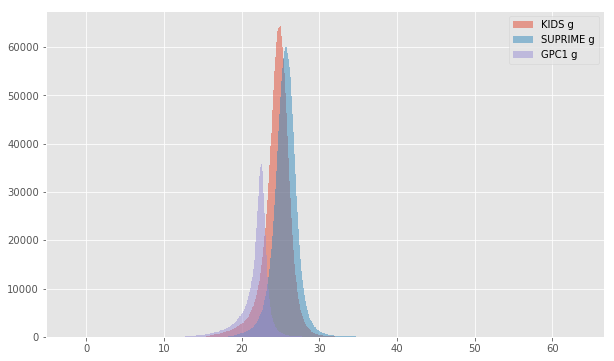

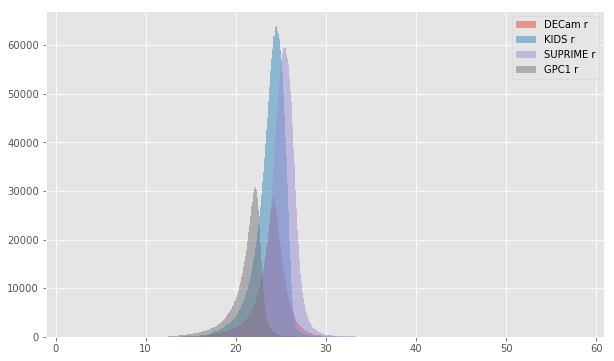

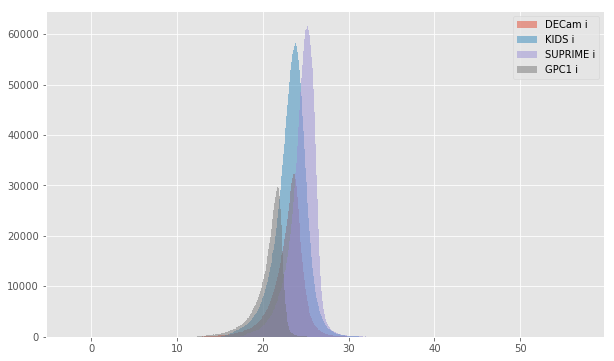

HELP warning: the column m_decam_z (DECam z) is empty.


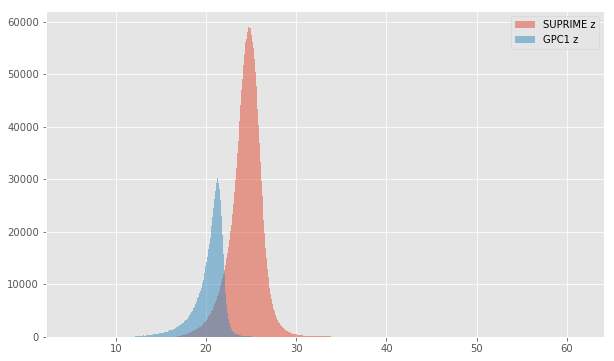

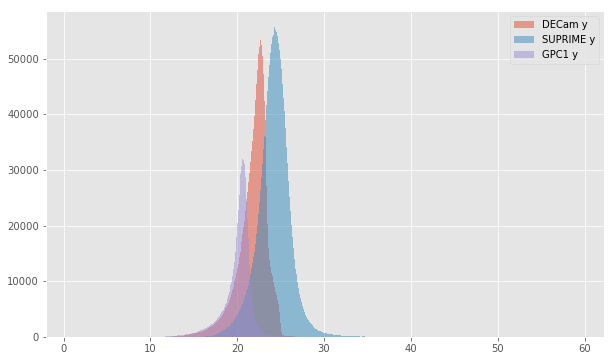

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

No sources have both DECam g (aperture) and KIDS g (aperture) values.
No sources have both DECam g (total) and KIDS g (total) values.
No sources have both DECam g (aperture) and SUPRIME g (aperture) values.
No sources have both DECam g (total) and SUPRIME g (total) values.
No sources have both DECam g (aperture) and GPC1 g (aperture) values.
No sources have both DECam g (total) and GPC1 g (total) values.
SUPRIME g (aperture) - KIDS g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.15
- 1% percentile: -1.639749526977539
- 99% percentile: 0.9492244338989275


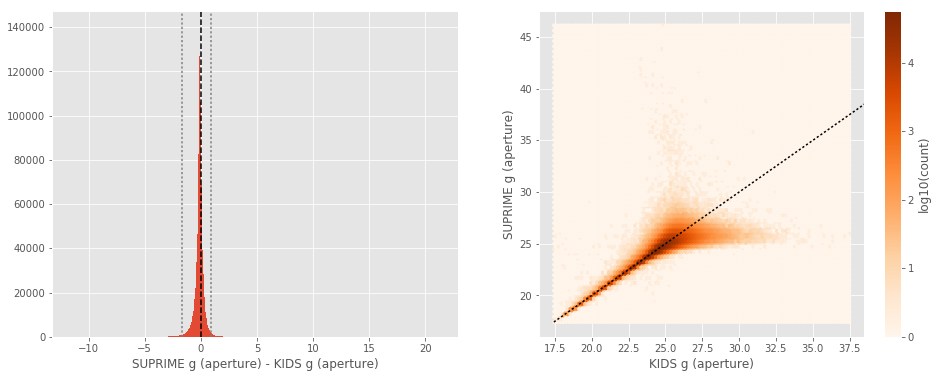

SUPRIME g (total) - KIDS g (total):
- Median: -0.28
- Median Absolute Deviation: 0.25
- 1% percentile: -2.5640608215332032
- 99% percentile: 1.1282776641845618


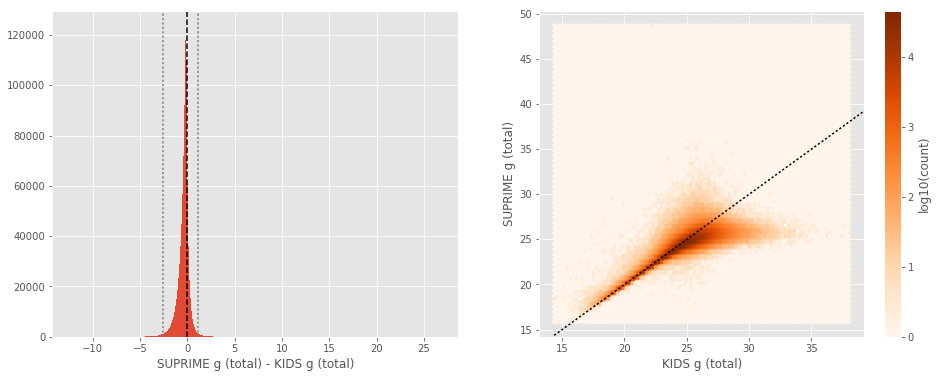

GPC1 g (aperture) - KIDS g (aperture):
- Median: -0.31
- Median Absolute Deviation: 0.38
- 1% percentile: -3.1371240997314453
- 99% percentile: 2.213498001098639


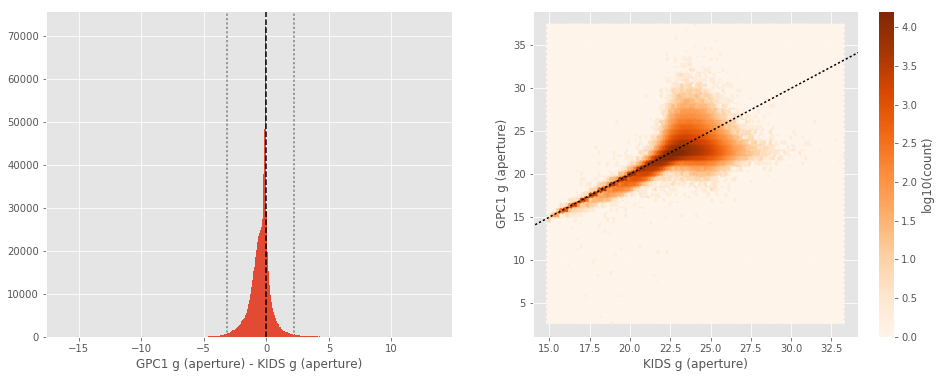

GPC1 g (total) - KIDS g (total):
- Median: -0.12
- Median Absolute Deviation: 0.25
- 1% percentile: -3.543268280029297
- 99% percentile: 1.5813421630859281


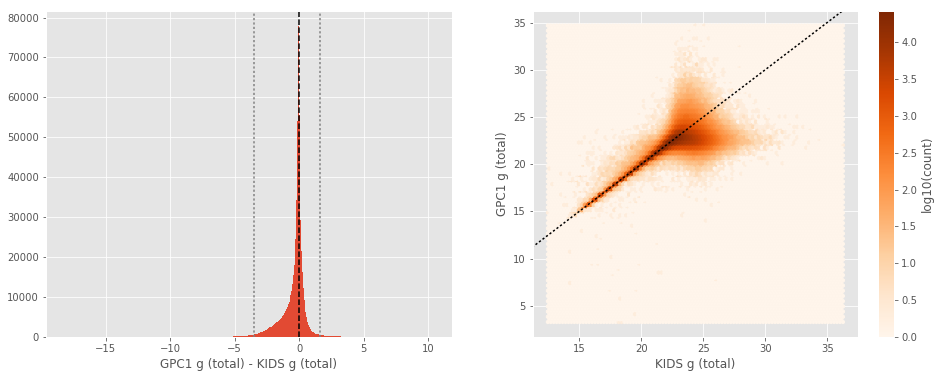

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.28
- Median Absolute Deviation: 0.43
- 1% percentile: -3.1680870056152344
- 99% percentile: 2.4179883003234885


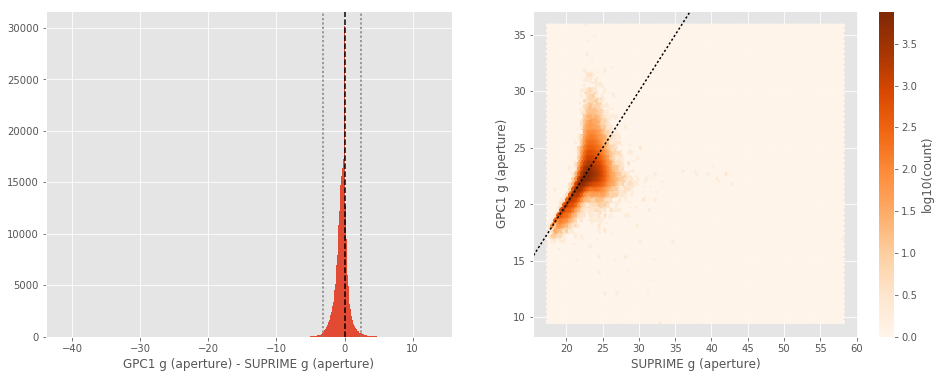

GPC1 g (total) - SUPRIME g (total):
- Median: -0.04
- Median Absolute Deviation: 0.30
- 1% percentile: -3.2857778167724607
- 99% percentile: 1.7586553955078141


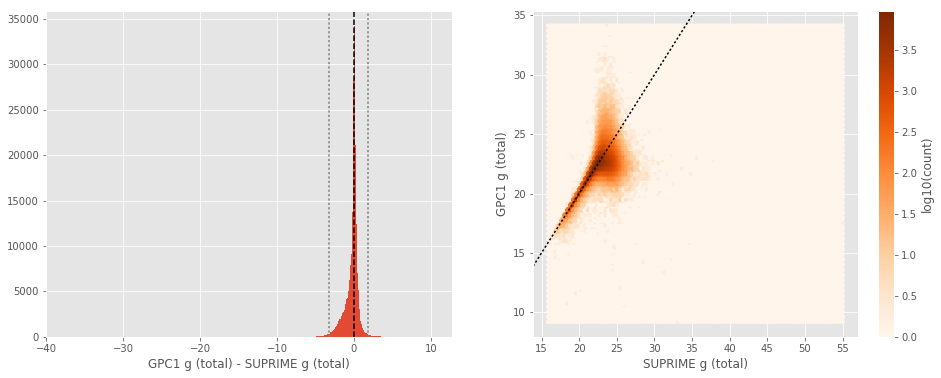

KIDS r (aperture) - DECam r (aperture):
- Median: -0.70
- Median Absolute Deviation: 0.44
- 1% percentile: -3.8088677978515624
- 99% percentile: 0.6727523803710938


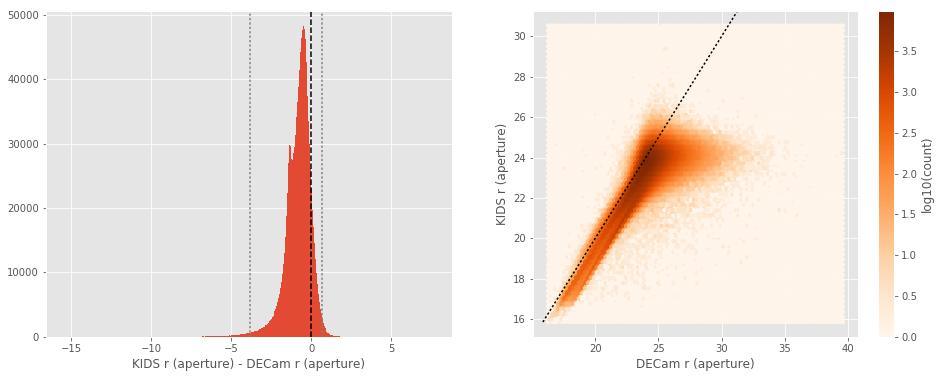

KIDS r (total) - DECam r (total):
- Median: -0.78
- Median Absolute Deviation: 0.45
- 1% percentile: -3.6640729904174805
- 99% percentile: 0.9124132156372005


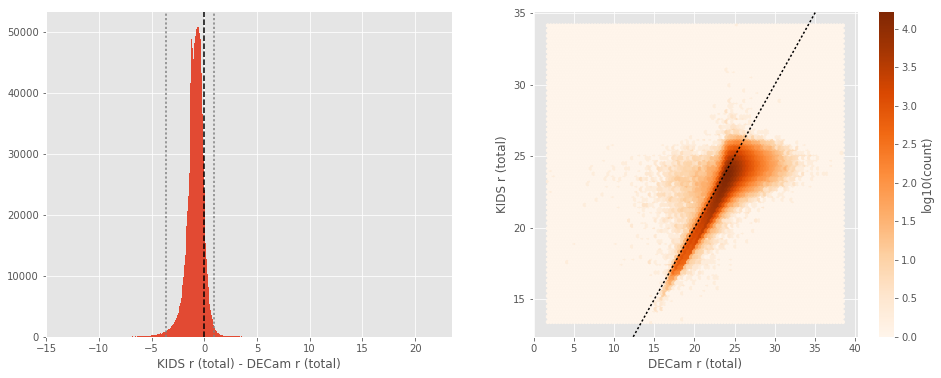

SUPRIME r (aperture) - DECam r (aperture):
- Median: -0.68
- Median Absolute Deviation: 0.45
- 1% percentile: -3.9173989295959473
- 99% percentile: 1.1831946372985864


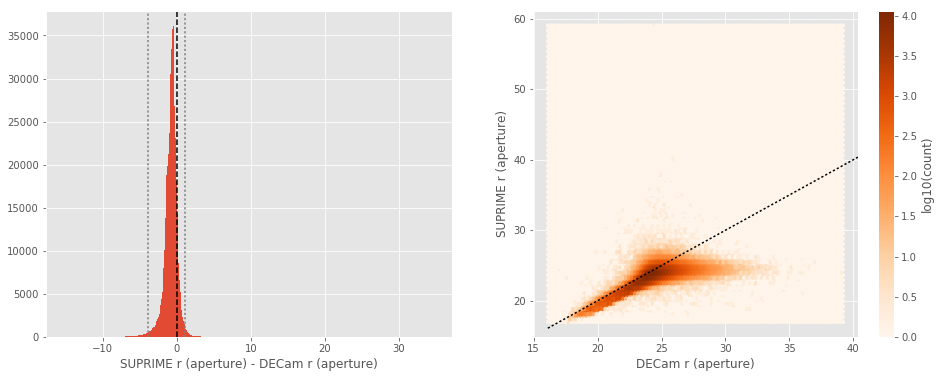

SUPRIME r (total) - DECam r (total):
- Median: -0.93
- Median Absolute Deviation: 0.43
- 1% percentile: -4.053550262451172
- 99% percentile: 1.1088246154785022


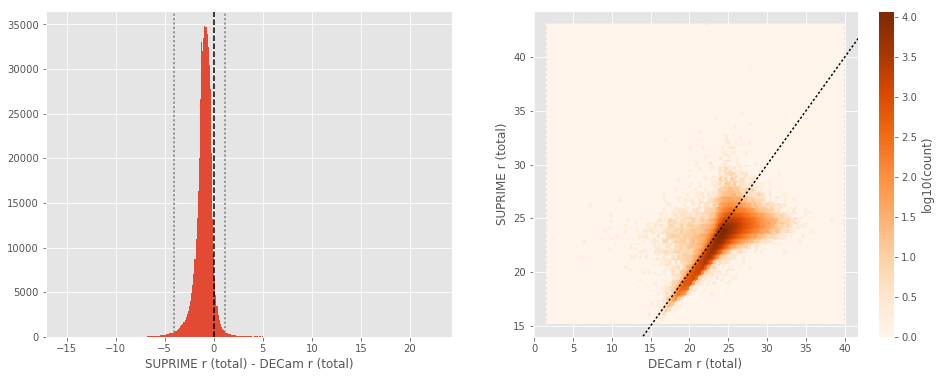

GPC1 r (aperture) - DECam r (aperture):
- Median: -1.09
- Median Absolute Deviation: 0.39
- 1% percentile: -3.7203458976745605
- 99% percentile: 0.5200489234924243


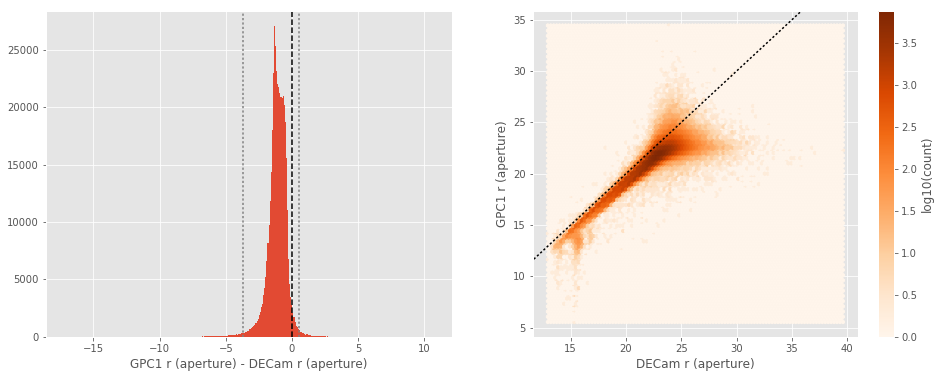

GPC1 r (total) - DECam r (total):
- Median: -0.93
- Median Absolute Deviation: 0.40
- 1% percentile: -3.610483169555664
- 99% percentile: 0.6347942352294932


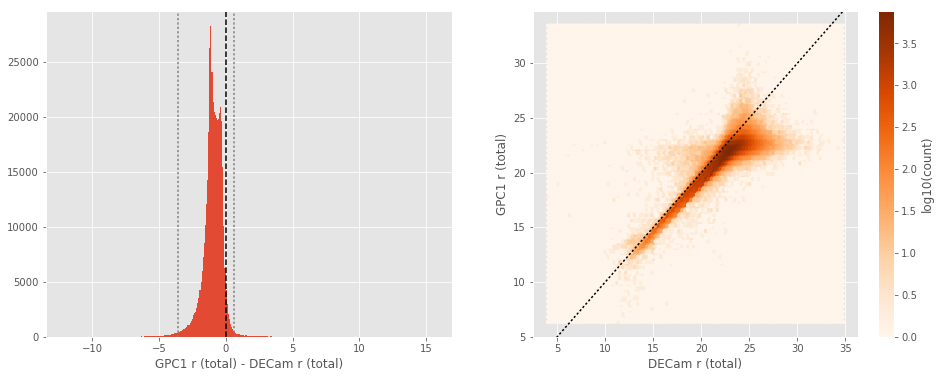

SUPRIME r (aperture) - KIDS r (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.11
- 1% percentile: -0.852659034729004
- 99% percentile: 0.8960716247558587


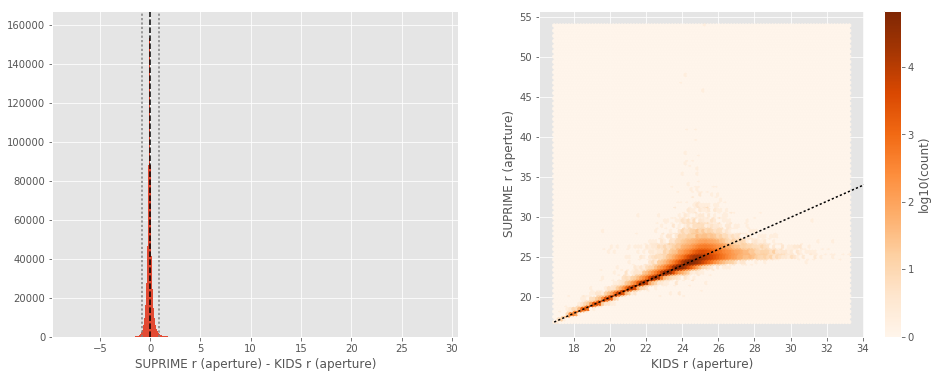

SUPRIME r (total) - KIDS r (total):
- Median: -0.19
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4241687774658205
- 99% percentile: 1.1404188156127932


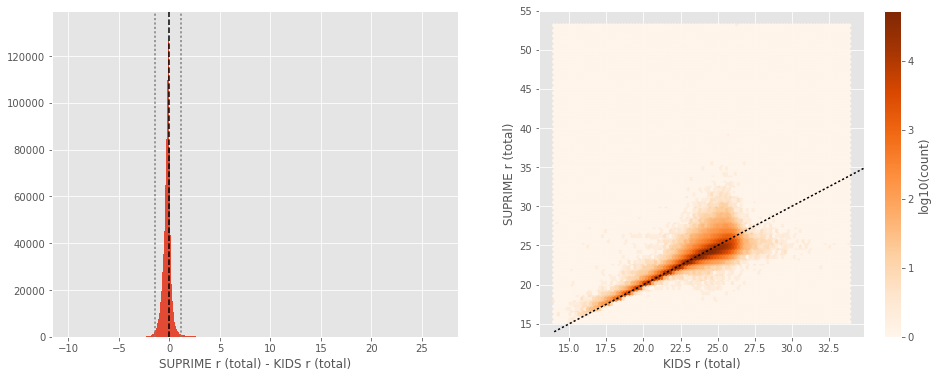

GPC1 r (aperture) - KIDS r (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.21
- 1% percentile: -1.351493549346924
- 99% percentile: 1.496449184417728


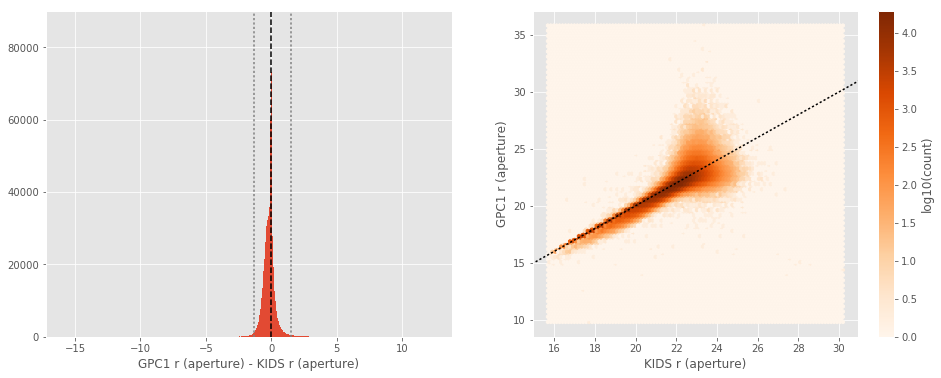

GPC1 r (total) - KIDS r (total):
- Median: 0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -1.5403207397460938
- 99% percentile: 1.16571809768676


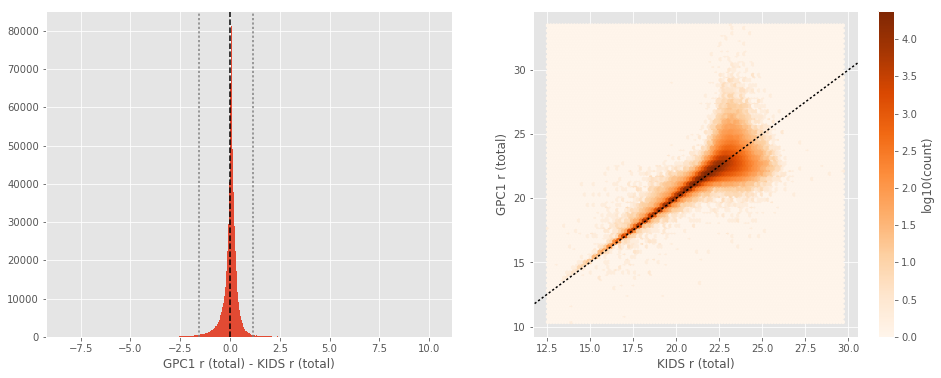

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.23
- 1% percentile: -1.5872383117675781
- 99% percentile: 1.525237350463859


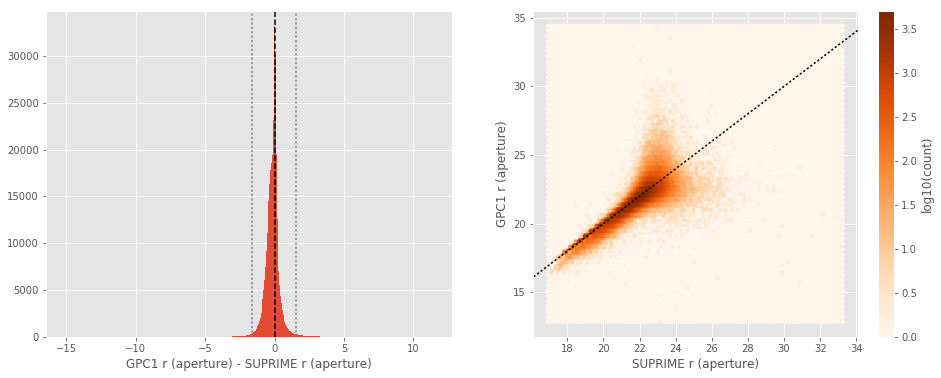

GPC1 r (total) - SUPRIME r (total):
- Median: 0.11
- Median Absolute Deviation: 0.15
- 1% percentile: -1.6637313461303709
- 99% percentile: 1.2613188362121595


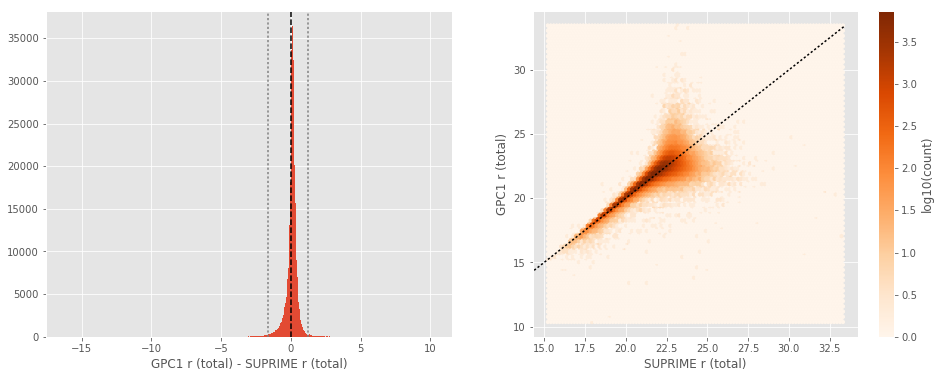

KIDS i (aperture) - DECam i (aperture):
- Median: -0.37
- Median Absolute Deviation: 0.33
- 1% percentile: -2.8999361419677734
- 99% percentile: 1.0785923767089827


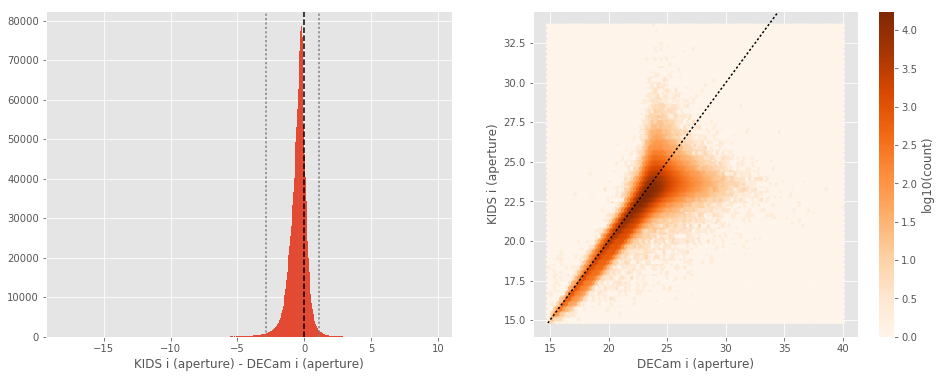

KIDS i (total) - DECam i (total):
- Median: -0.32
- Median Absolute Deviation: 0.32
- 1% percentile: -1.9150989532470704
- 99% percentile: 1.9198204040527456


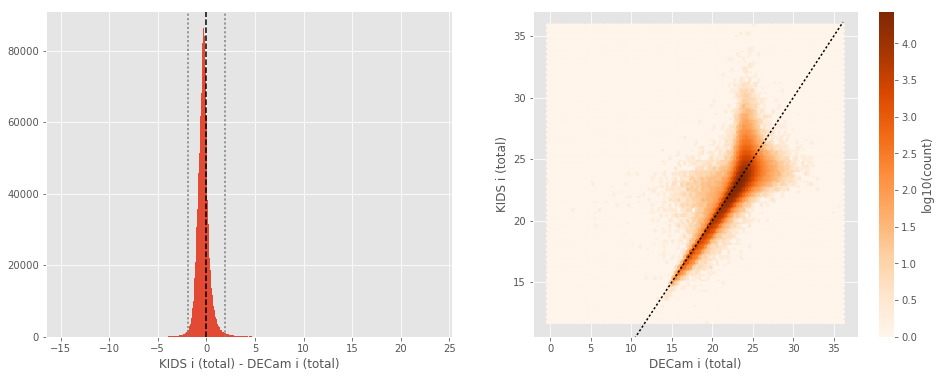

SUPRIME i (aperture) - DECam i (aperture):
- Median: -0.48
- Median Absolute Deviation: 0.35
- 1% percentile: -3.4942554473876957
- 99% percentile: 0.8745538139343247


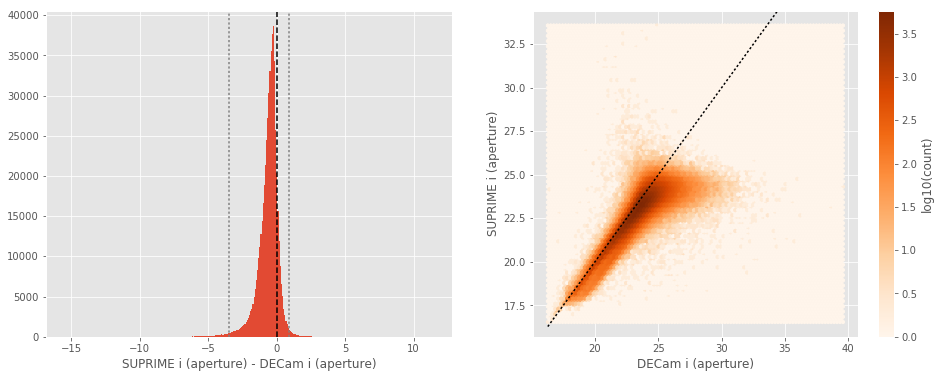

SUPRIME i (total) - DECam i (total):
- Median: -0.59
- Median Absolute Deviation: 0.33
- 1% percentile: -2.955655212402344
- 99% percentile: 1.211650524139405


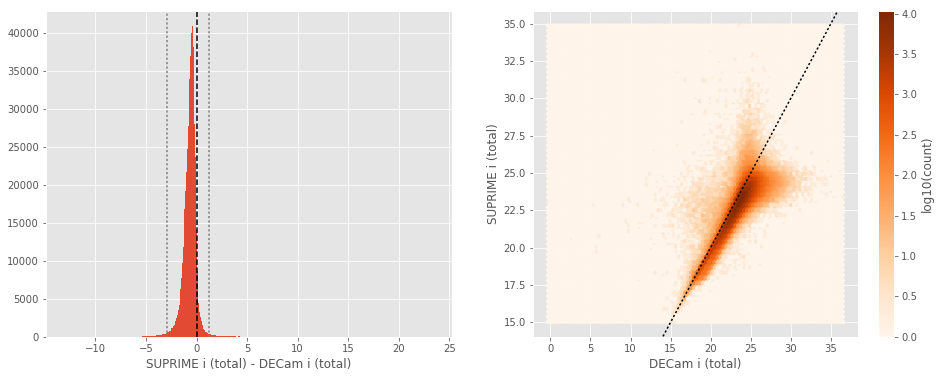

GPC1 i (aperture) - DECam i (aperture):
- Median: -0.50
- Median Absolute Deviation: 0.27
- 1% percentile: -2.4328741073608398
- 99% percentile: 0.43892814636230604


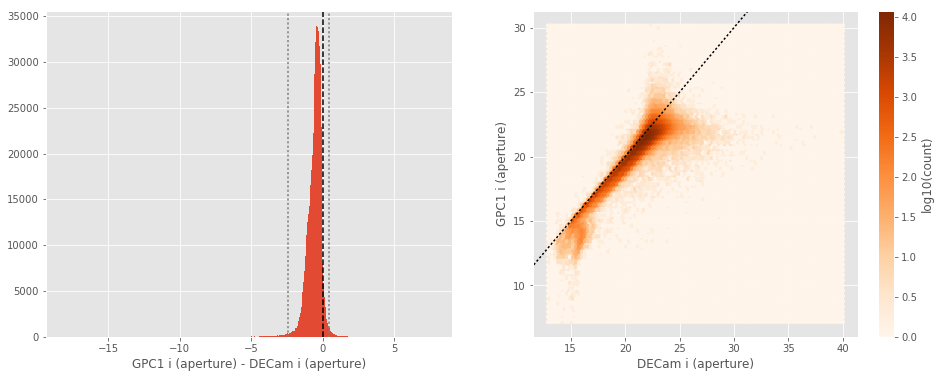

GPC1 i (total) - DECam i (total):
- Median: -0.30
- Median Absolute Deviation: 0.27
- 1% percentile: -1.7496144104003906
- 99% percentile: 0.6908638000488327


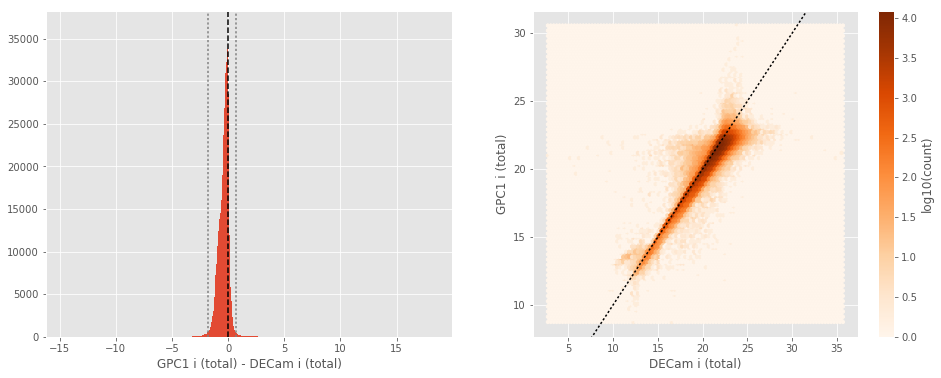

SUPRIME i (aperture) - KIDS i (aperture):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -2.0469532012939453
- 99% percentile: 1.169138336181641


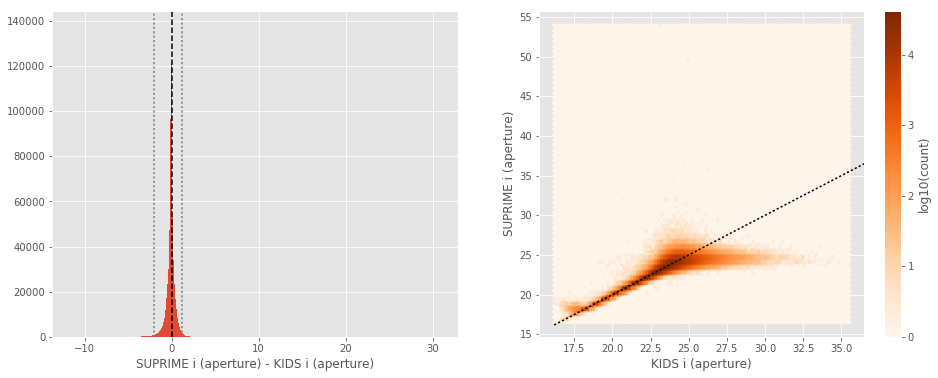

SUPRIME i (total) - KIDS i (total):
- Median: -0.27
- Median Absolute Deviation: 0.27
- 1% percentile: -3.016033172607422
- 99% percentile: 1.297071933746338


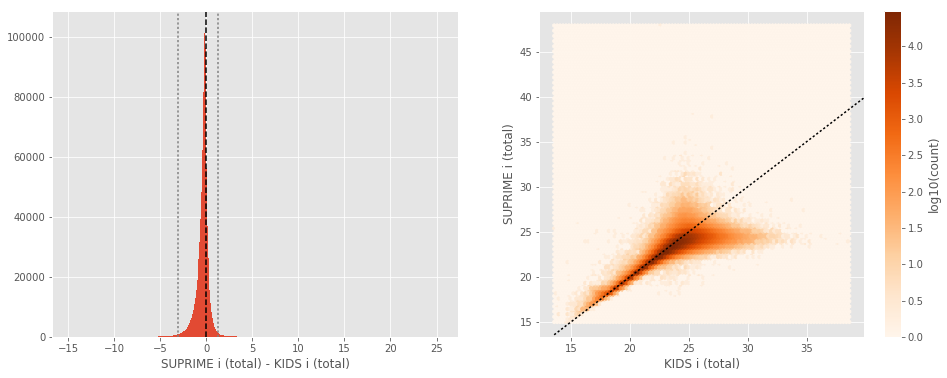

GPC1 i (aperture) - KIDS i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9477005386352539
- 99% percentile: 0.818601818084717


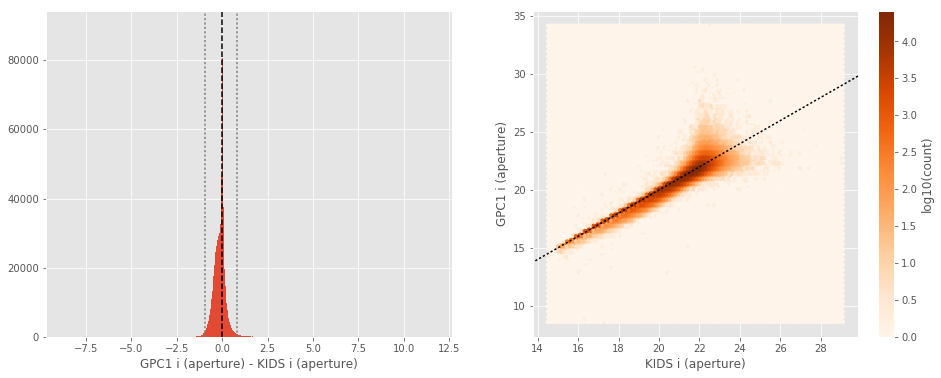

GPC1 i (total) - KIDS i (total):
- Median: 0.05
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8343010139465332
- 99% percentile: 0.6969108963012687


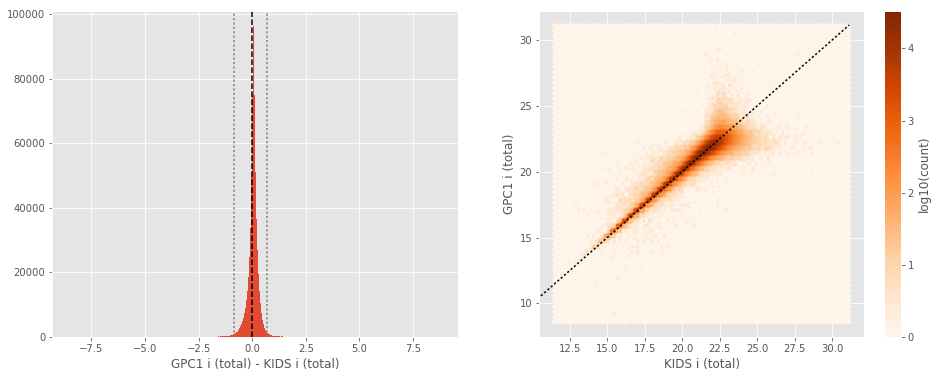

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1367273139953613
- 99% percentile: 0.9213391876220709


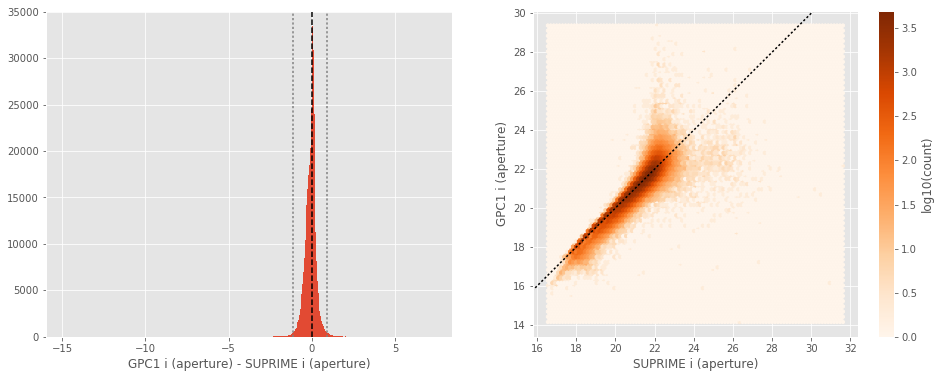

GPC1 i (total) - SUPRIME i (total):
- Median: 0.20
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8914554595947265
- 99% percentile: 0.7686335754394538


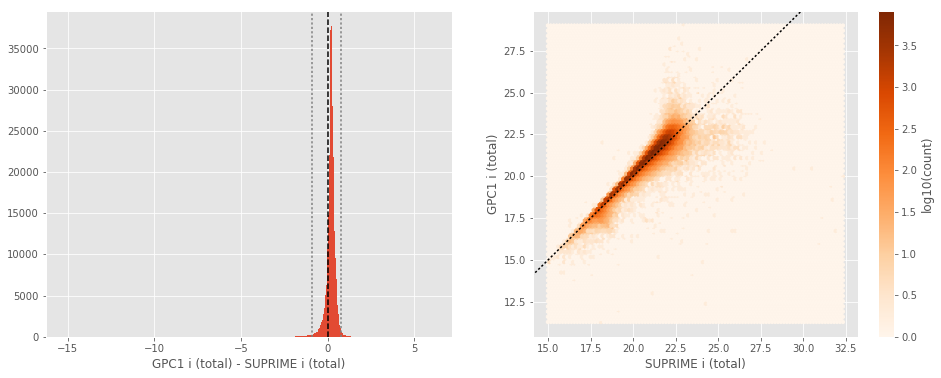

No sources have both DECam z (aperture) and SUPRIME z (aperture) values.
No sources have both DECam z (total) and SUPRIME z (total) values.
No sources have both DECam z (aperture) and GPC1 z (aperture) values.
No sources have both DECam z (total) and GPC1 z (total) values.
GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1917795181274413
- 99% percentile: 1.2728551101684569


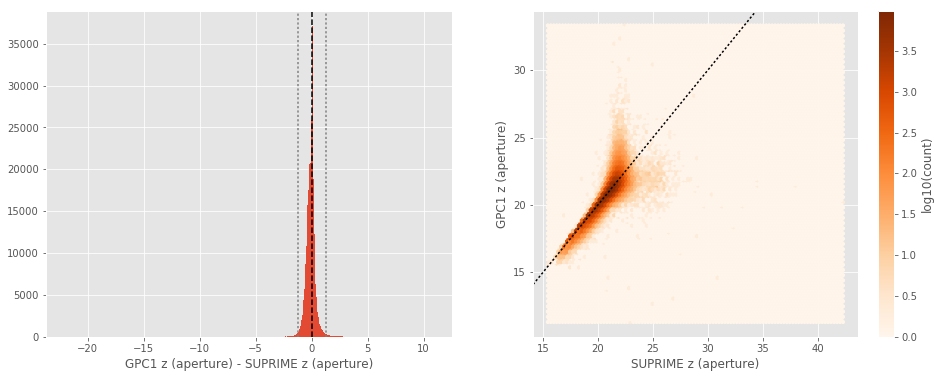

GPC1 z (total) - SUPRIME z (total):
- Median: 0.18
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0532553100585937
- 99% percentile: 0.9818671417236327


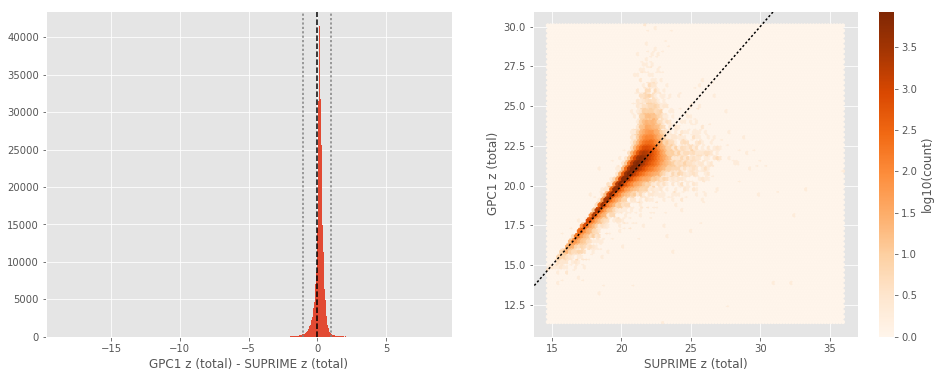

SUPRIME y (aperture) - DECam y (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.22
- 1% percentile: -2.479114055633545
- 99% percentile: 1.2441625595092773


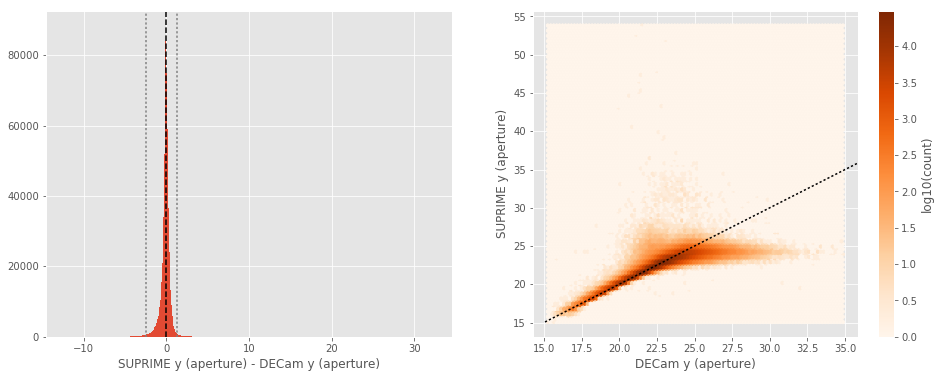

SUPRIME y (total) - DECam y (total):
- Median: -0.09
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1775811195373536
- 99% percentile: 1.5071928024292074


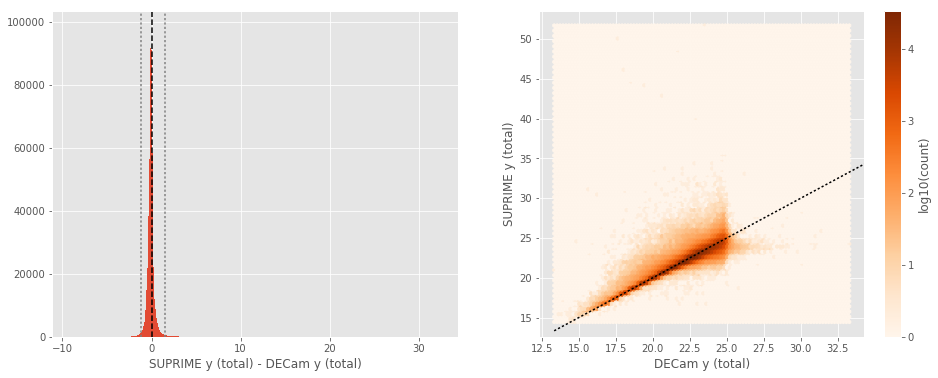

GPC1 y (aperture) - DECam y (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.18
- 1% percentile: -2.1188339138031007
- 99% percentile: 1.5731890678405795


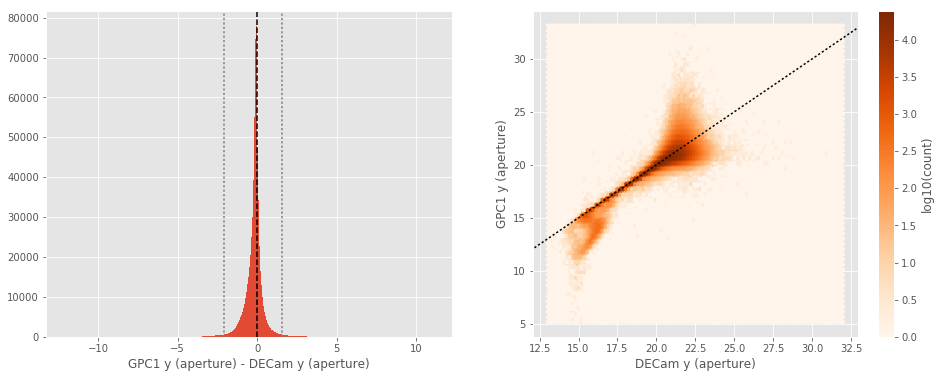

GPC1 y (total) - DECam y (total):
- Median: 0.08
- Median Absolute Deviation: 0.20
- 1% percentile: -1.8769407653808594
- 99% percentile: 1.6991668701171863


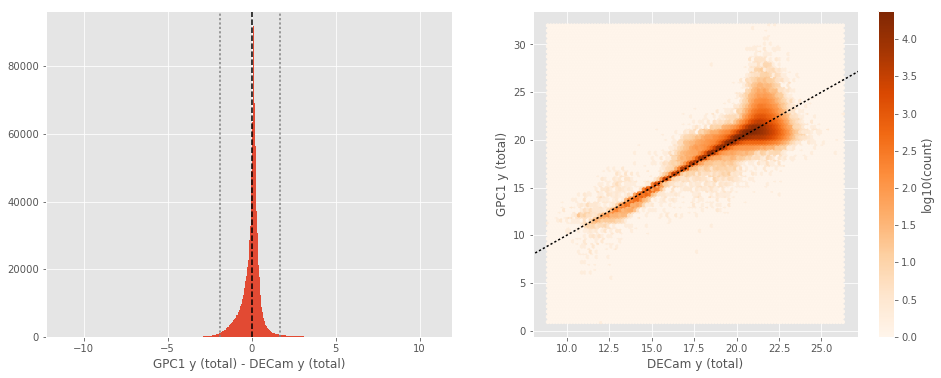

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.28
- 1% percentile: -1.8443033599853516
- 99% percentile: 1.679386215209945


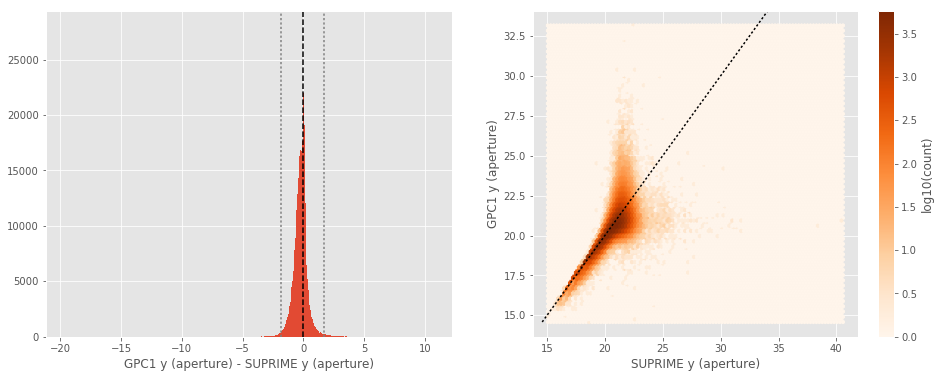

GPC1 y (total) - SUPRIME y (total):
- Median: 0.09
- Median Absolute Deviation: 0.23
- 1% percentile: -2.0898357391357423
- 99% percentile: 1.6052894592285112


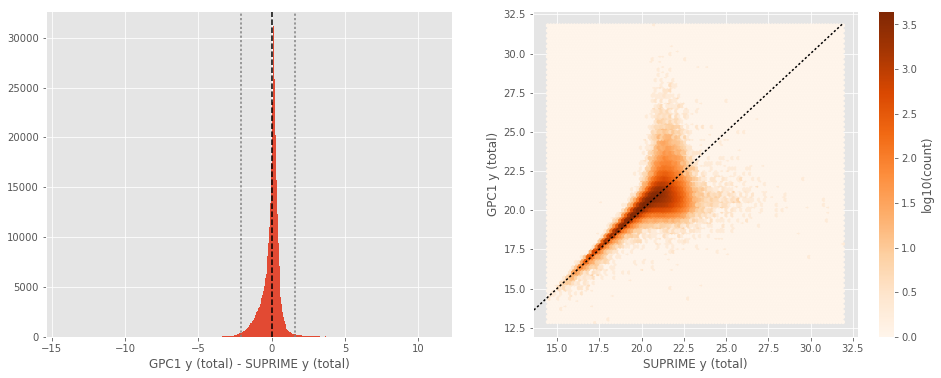

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-15.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

KIDS u (aperture) - SDSS u (fiberMag):
- Median: 0.06
- Median Absolute Deviation: 0.42
- 1% percentile: -1.6777833557128907
- 99% percentile: 2.9605518531799304


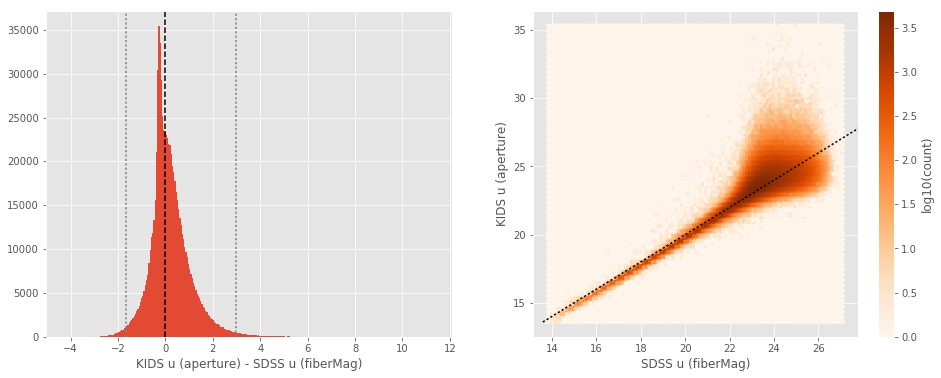

KIDS u (total) - SDSS u (petroMag):
- Median: 0.06
- Median Absolute Deviation: 0.42
- 1% percentile: -1.6777833557128907
- 99% percentile: 2.9605518531799304


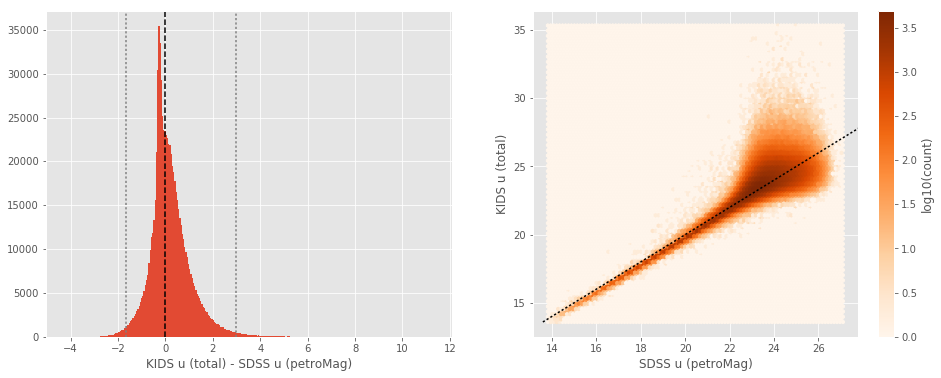

No sources have both SDSS g (fiberMag) and DECam g (aperture) values.
No sources have both SDSS g (petroMag) and DECam g (total) values.
KIDS g (aperture) - SDSS g (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0146896362304687
- 99% percentile: 0.964009094238282


/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less


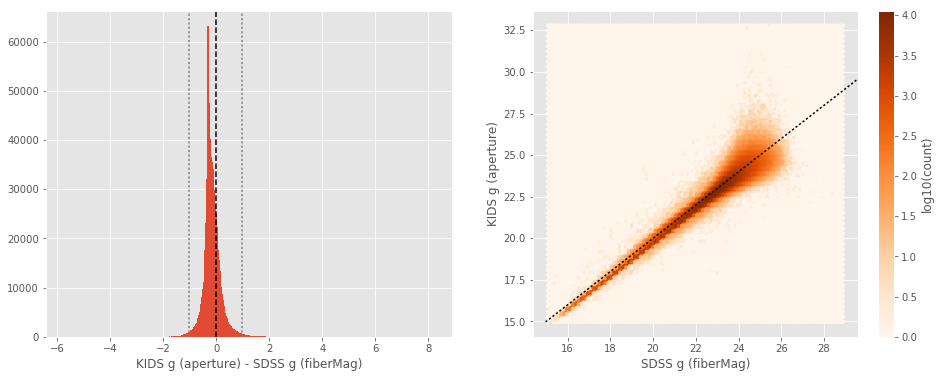

KIDS g (total) - SDSS g (petroMag):
- Median: -0.21
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0146896362304687
- 99% percentile: 0.964009094238282


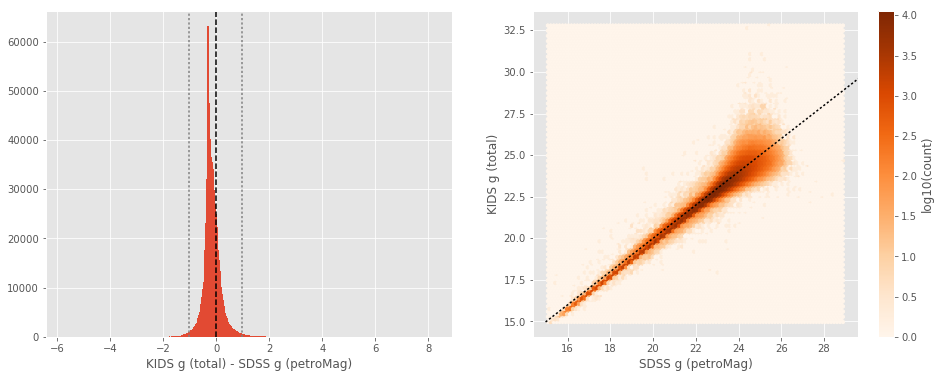

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.16
- 1% percentile: -1.101328353881836
- 99% percentile: 0.9030104446411131


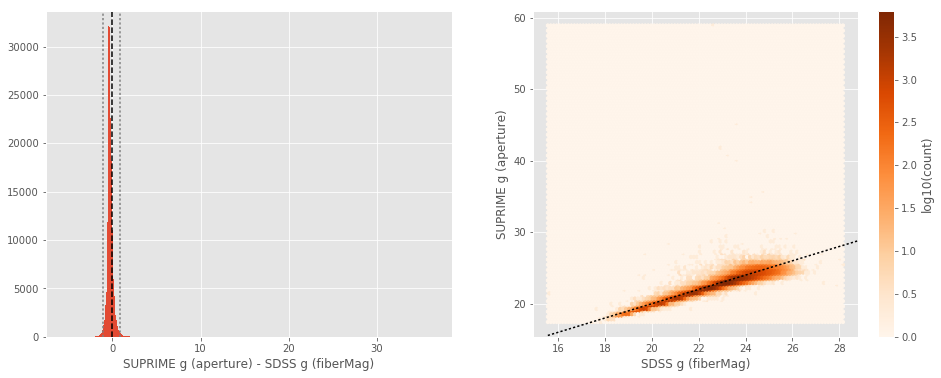

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.16
- 1% percentile: -1.101328353881836
- 99% percentile: 0.9030104446411131


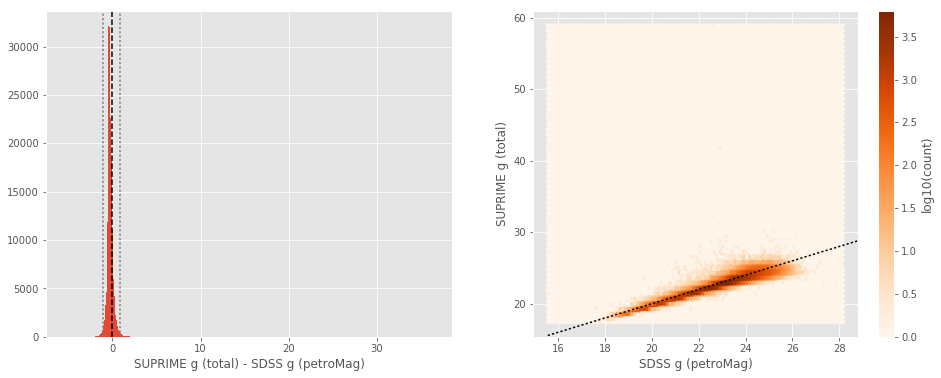

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.50
- Median Absolute Deviation: 0.29
- 1% percentile: -2.722372722625732
- 99% percentile: 1.9057563209533683


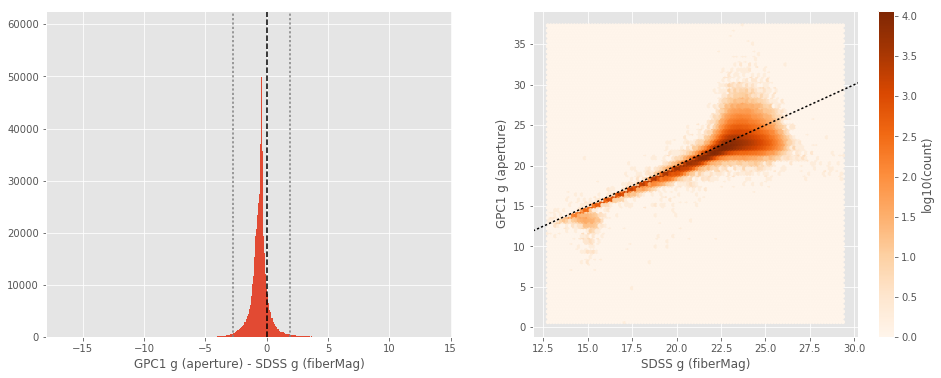

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.50
- Median Absolute Deviation: 0.29
- 1% percentile: -2.722372722625732
- 99% percentile: 1.9057563209533683


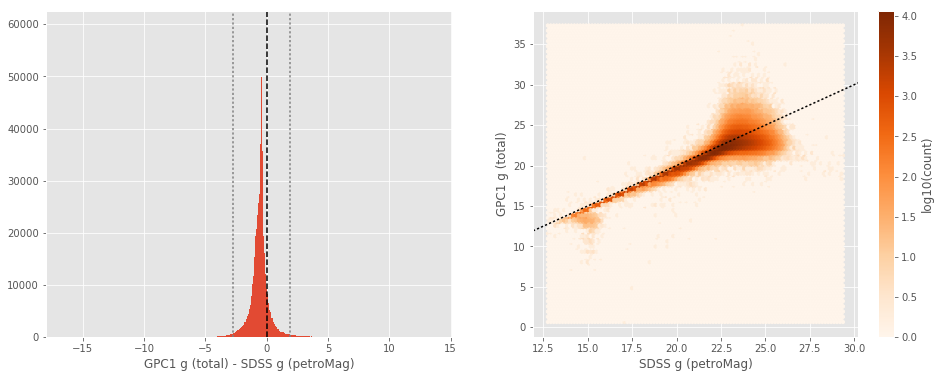

DECam r (aperture) - SDSS r (fiberMag):
- Median: 0.59
- Median Absolute Deviation: 0.37
- 1% percentile: -0.4526587295532226
- 99% percentile: 2.8505001258849787


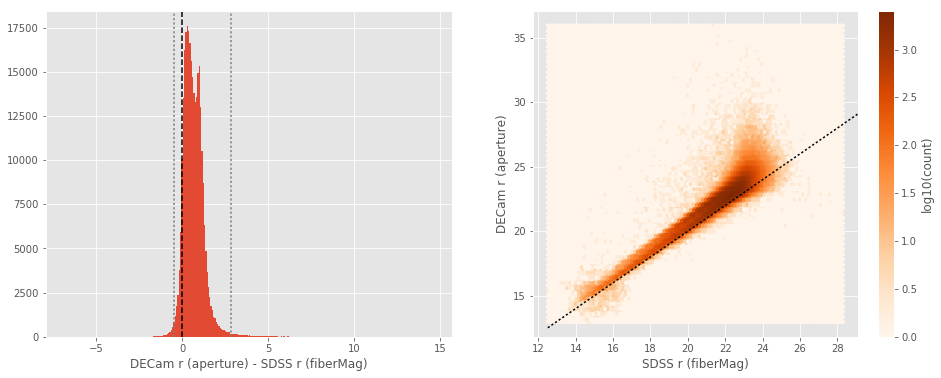

DECam r (total) - SDSS r (petroMag):
- Median: 0.59
- Median Absolute Deviation: 0.37
- 1% percentile: -0.4526587295532226
- 99% percentile: 2.8505001258849787


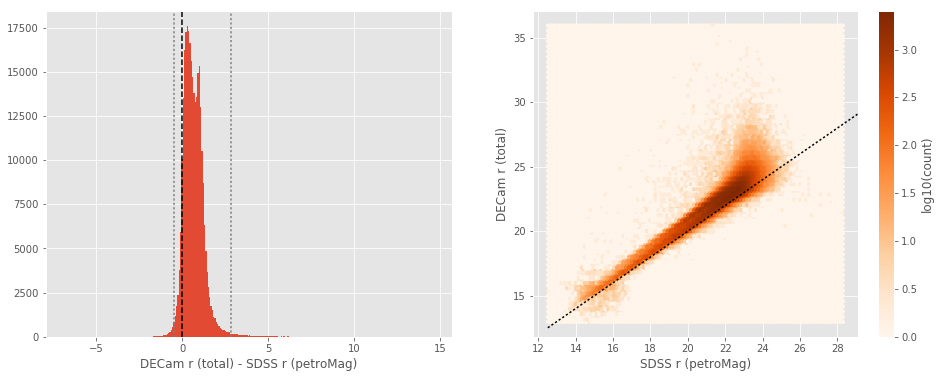

KIDS r (aperture) - SDSS r (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9293210601806641
- 99% percentile: 0.3801486206054674


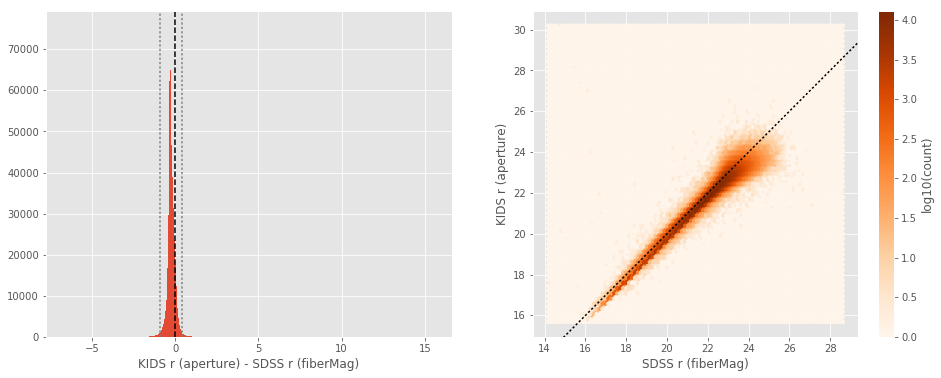

KIDS r (total) - SDSS r (petroMag):
- Median: -0.26
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9293210601806641
- 99% percentile: 0.3801486206054674


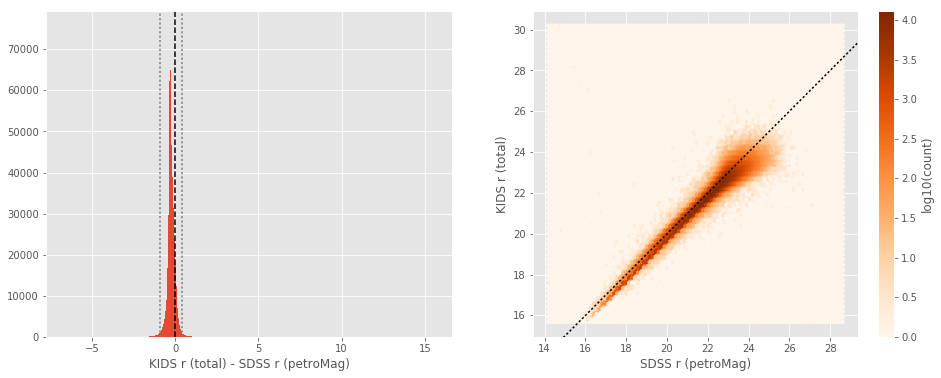

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9976795959472656
- 99% percentile: 0.5201865768432602


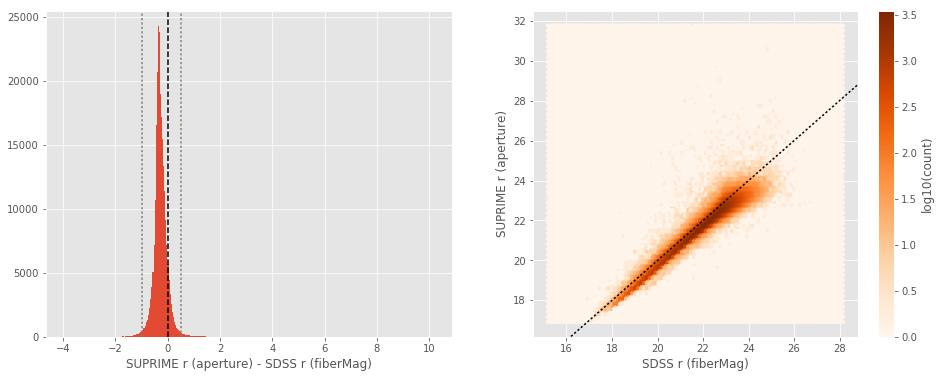

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9976795959472656
- 99% percentile: 0.5201865768432602


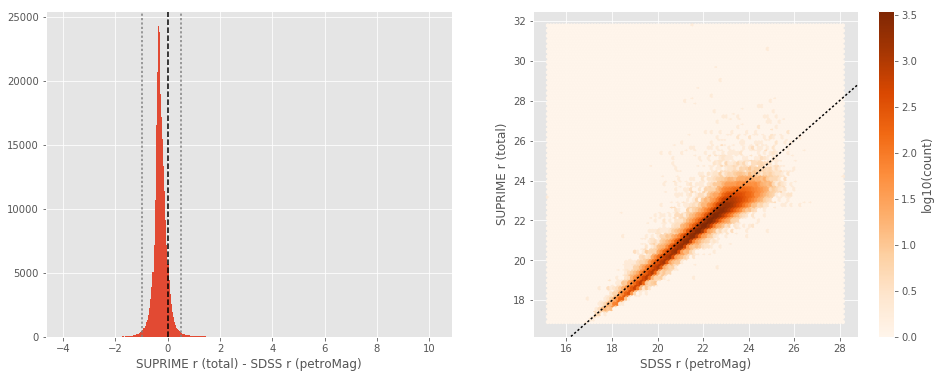

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4835214614868164
- 99% percentile: 0.963675765991213


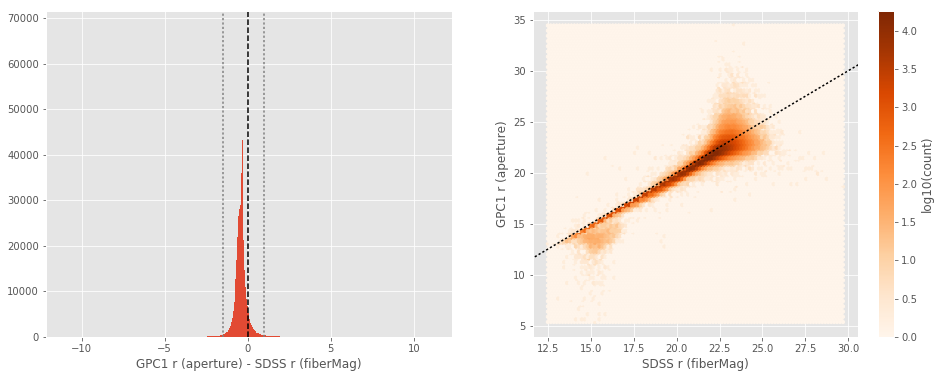

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.38
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4835214614868164
- 99% percentile: 0.963675765991213


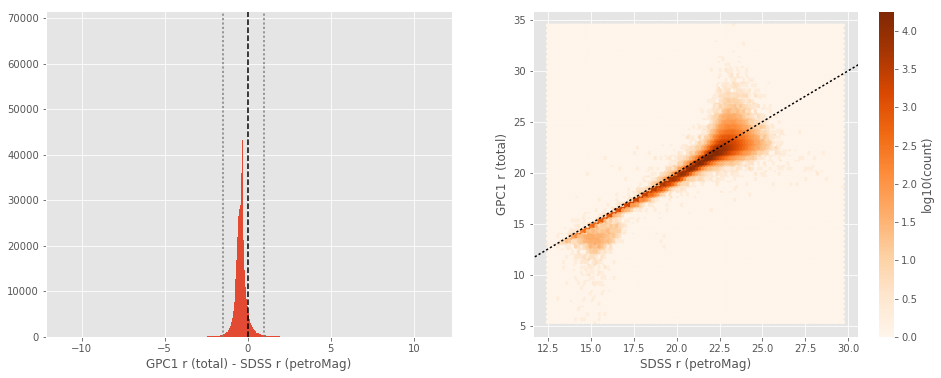

DECam i (aperture) - SDSS i (fiberMag):
- Median: 0.04
- Median Absolute Deviation: 0.22
- 1% percentile: -0.7525212097167968
- 99% percentile: 1.6925888824462914


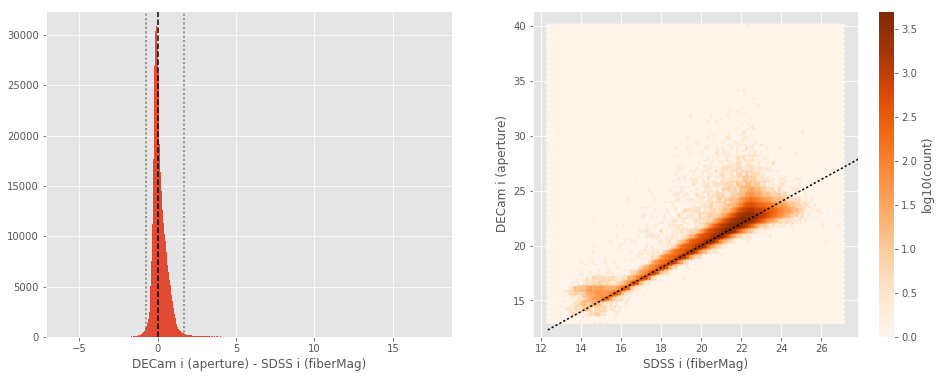

DECam i (total) - SDSS i (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.22
- 1% percentile: -0.7525212097167968
- 99% percentile: 1.6925888824462914


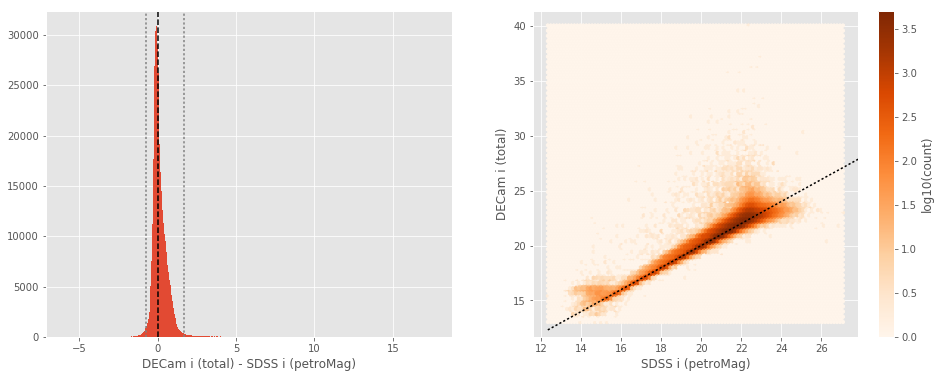

KIDS i (aperture) - SDSS i (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9334051704406738
- 99% percentile: 0.4504371833801264


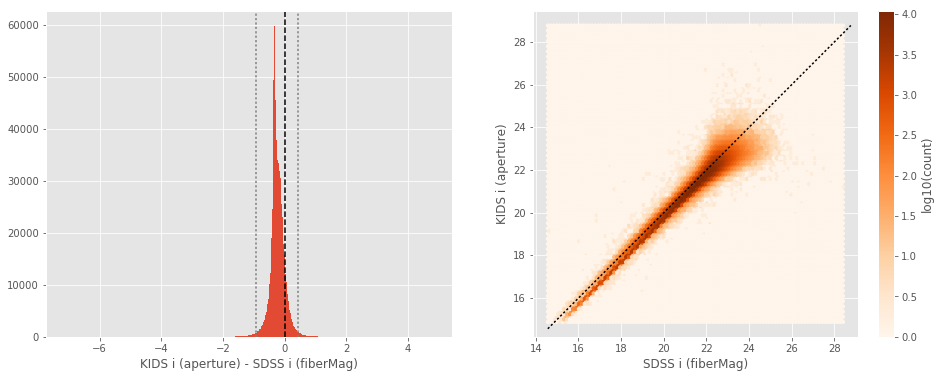

KIDS i (total) - SDSS i (petroMag):
- Median: -0.26
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9334051704406738
- 99% percentile: 0.4504371833801264


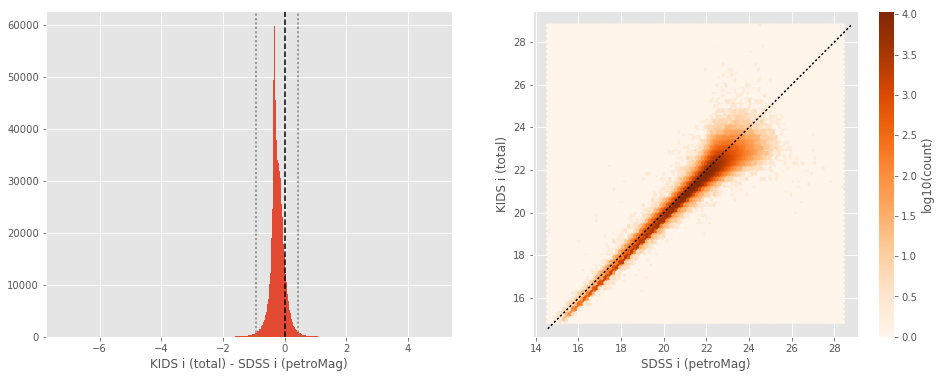

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0101194763183594
- 99% percentile: 0.5216849517822294


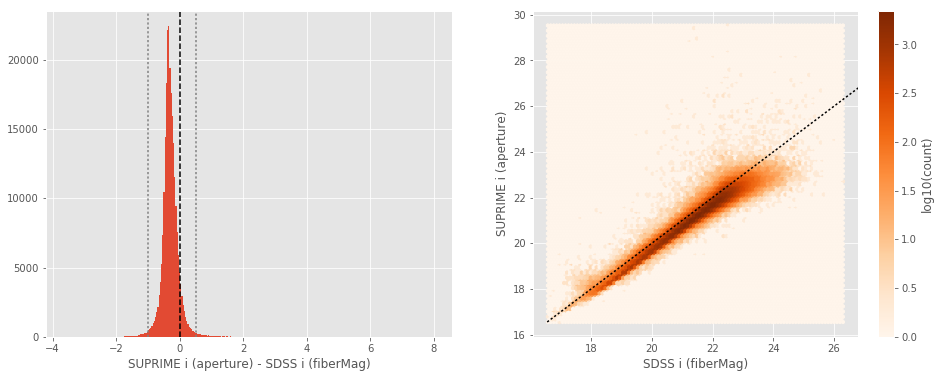

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.32
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0101194763183594
- 99% percentile: 0.5216849517822294


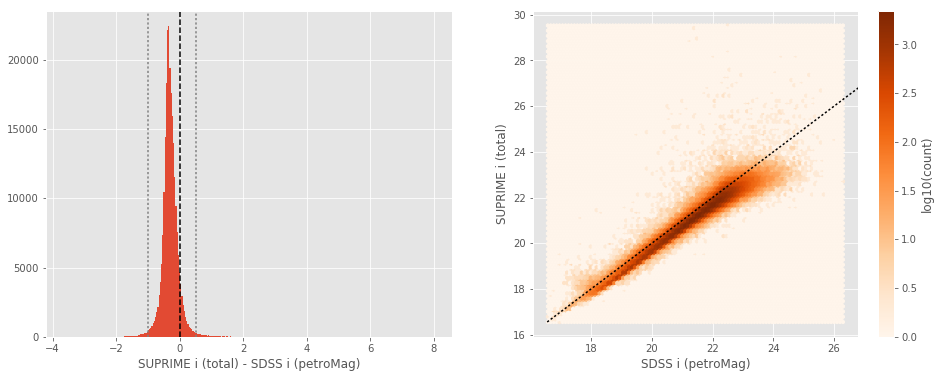

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0264884567260741
- 99% percentile: 0.4694122505188034


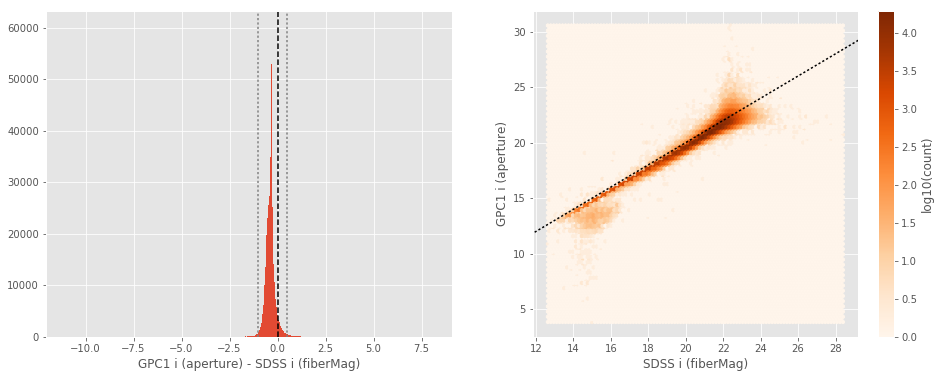

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0264884567260741
- 99% percentile: 0.4694122505188034


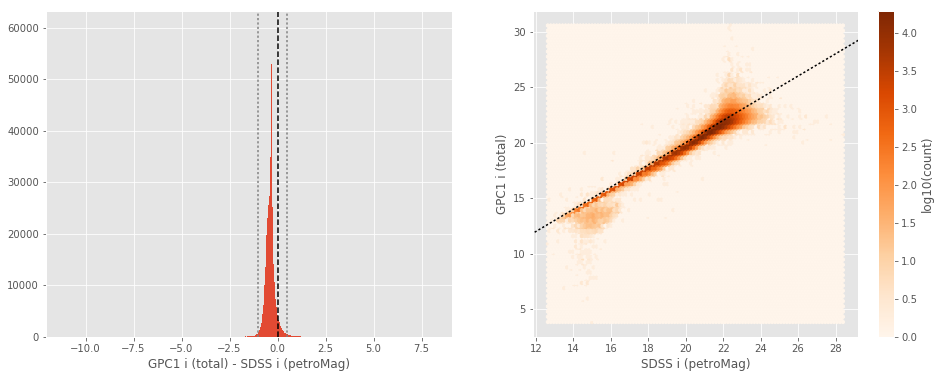

No sources have both SDSS z (fiberMag) and DECam z (aperture) values.
No sources have both SDSS z (petroMag) and DECam z (total) values.
SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.2618440628051757
- 99% percentile: 0.9837815856933585


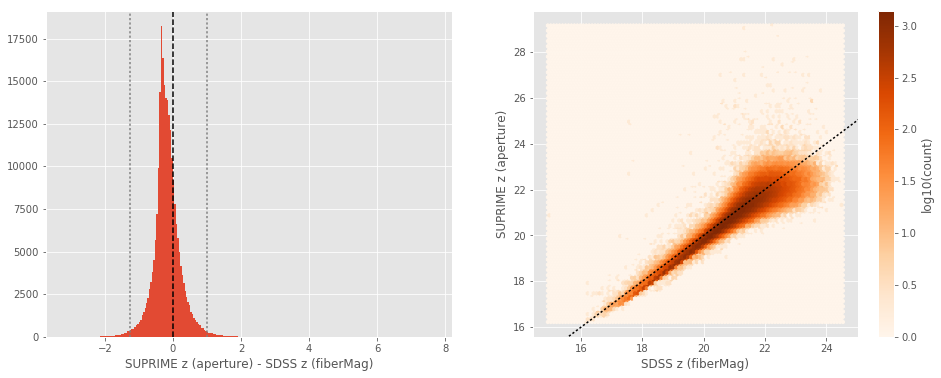

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.2618440628051757
- 99% percentile: 0.9837815856933585


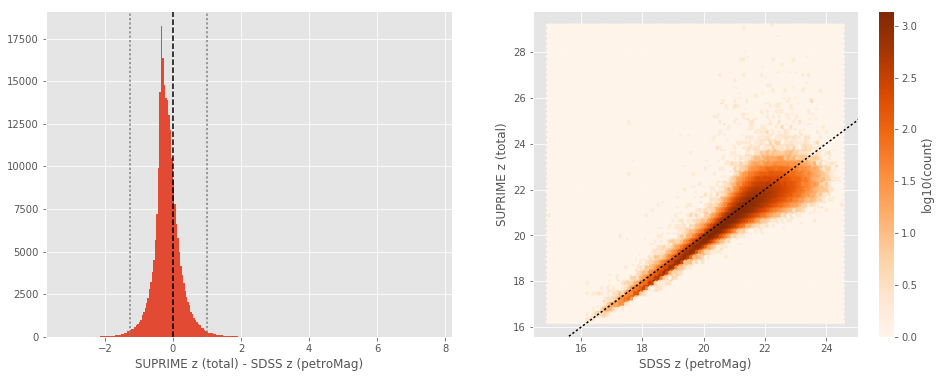

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4637153625488282
- 99% percentile: 1.1003234863281253


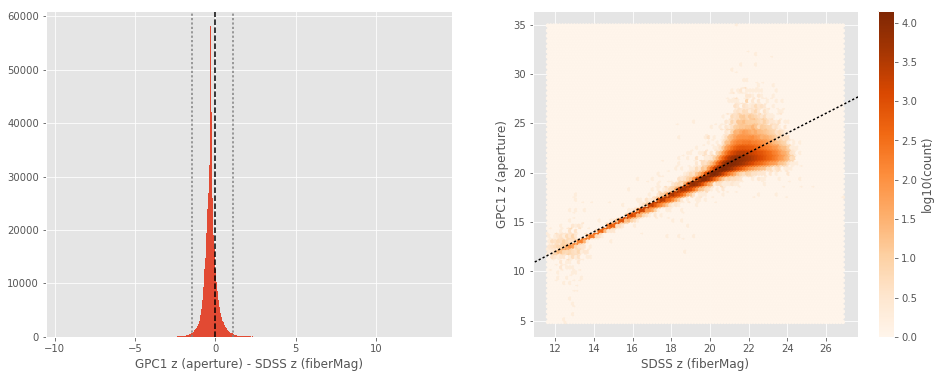

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4637153625488282
- 99% percentile: 1.1003234863281253


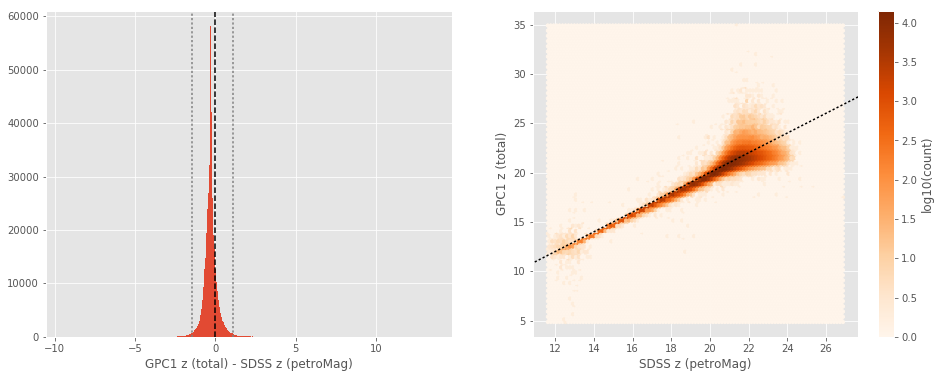

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
        
        sdss_mag_ap = sdss[sdss_mag_ap_colname]
        master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-15.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.06
- Median Absolute Deviation: 0.06
- 1% percentile: -0.7053935164548701
- 99% percentile: 0.6007433978365114


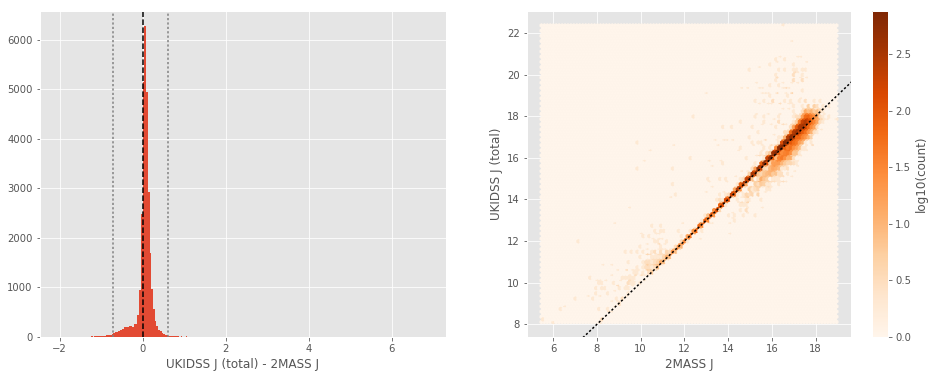

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.13
- Median Absolute Deviation: 0.09
- 1% percentile: -0.805631813264706
- 99% percentile: 1.106451120695254


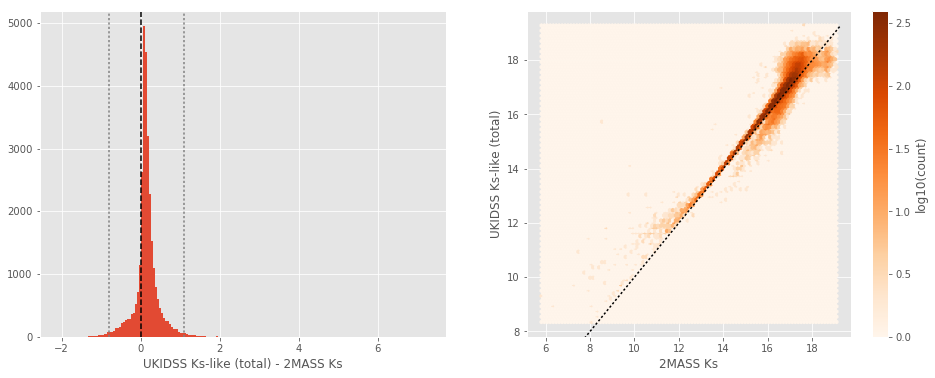

In [16]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

VISTA J (total) - 2MASS J:
- Median: 0.04
- Median Absolute Deviation: 0.07
- 1% percentile: -1.0083736126615364
- 99% percentile: 1.1275078088472599


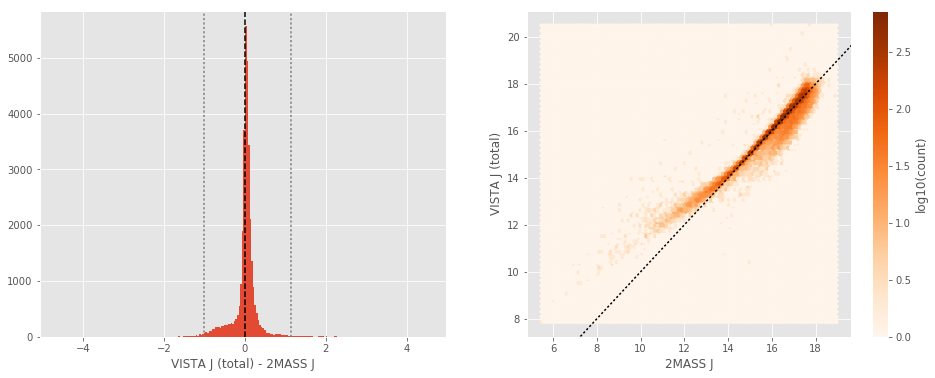

In [17]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vircam_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VIRCAM Ks (total) - 2MASS Ks:
- Median: 0.06
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9973885948809169
- 99% percentile: 1.2021790728894632


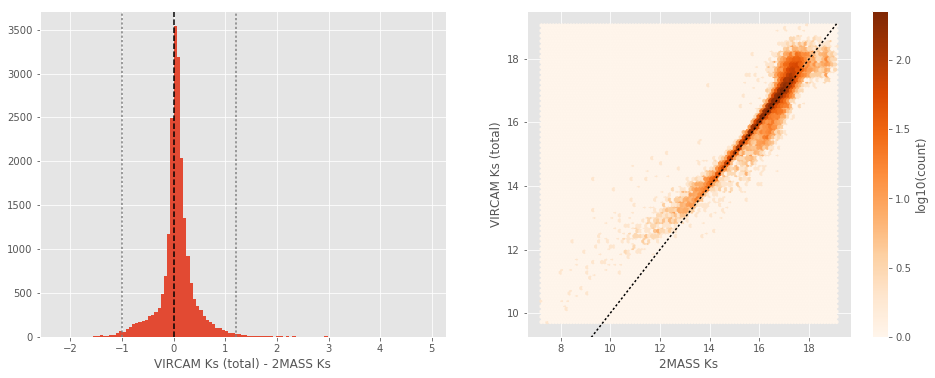

In [18]:
ukidss_ks_like = master_catalogue['m_vircam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "VIRCAM Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 5937538 / 14232884 (41.72%)


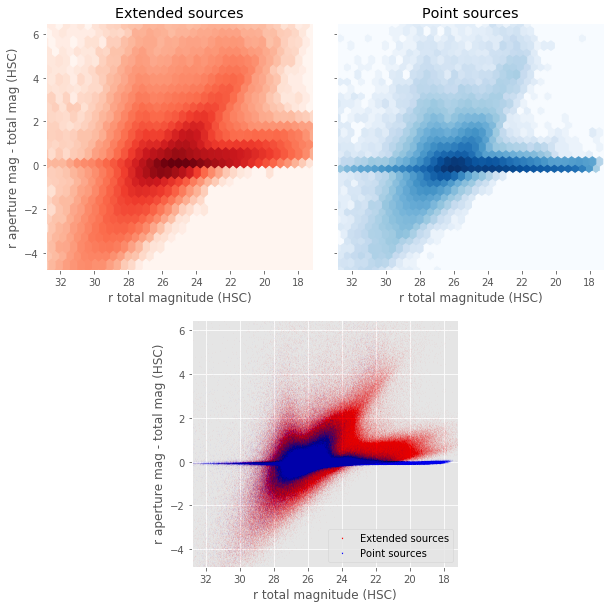

In [19]:
nb_ccplots(
    master_catalogue['m_suprime_r'],
    master_catalogue['m_ap_suprime_r'] - master_catalogue['m_suprime_r'],
    "r total magnitude (HSC)", "r aperture mag - total mag (HSC)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of source used: 68178 / 14232884 (0.48%)


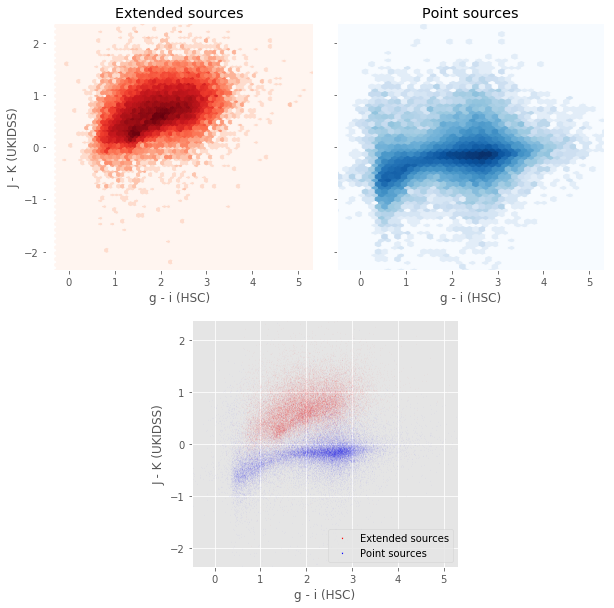

In [20]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 279701 / 14232884 (1.97%)


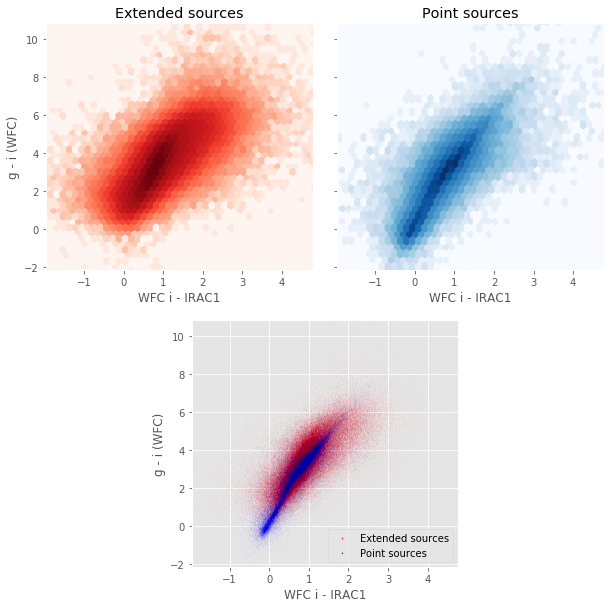

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_vircam_j'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_vircam_k'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 68180 / 14232884 (0.48%)


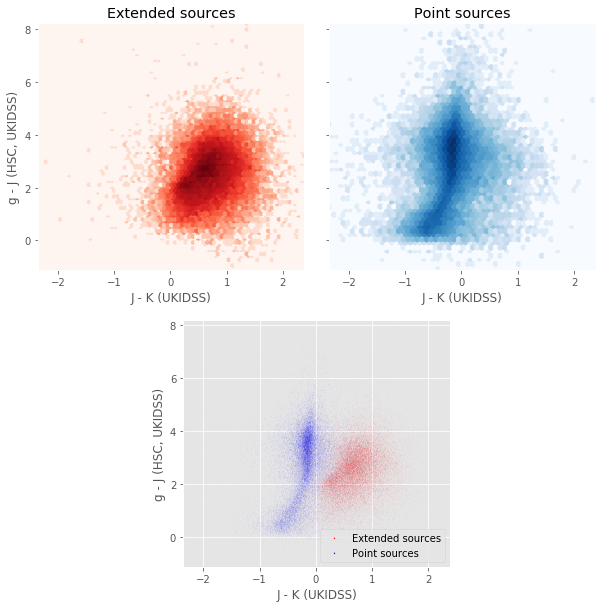

In [22]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of source used: 84746 / 14232884 (0.60%)


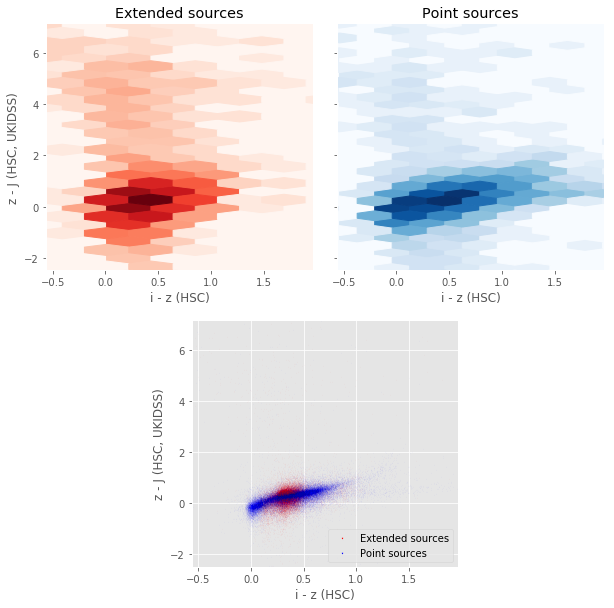

In [23]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_suprime_z'],
    master_catalogue['m_suprime_z'] - master_catalogue['m_ukidss_j'],
    "i - z (HSC)", "z - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)